In [121]:
import pandas as pd
decessi_covid = pd.read_csv('csv/decessi_covid19.csv')
decessi_covid.head()

,data,deceduti
0,2020-02-24,7.0
1,2020-02-25,3.0
2,2020-02-26,2.0
3,2020-02-27,5.0
4,2020-02-28,4.0


In [122]:
decessi_covid.data = pd.to_datetime(decessi_covid.data)
decessi_covid.deceduti = pd.to_numeric(decessi_covid.deceduti)

decessi_covid=decessi_covid.set_index('data')
decessi_covid.head()

,deceduti
data,
2020-02-24,7.0
2020-02-25,3.0
2020-02-26,2.0
2020-02-27,5.0
2020-02-28,4.0


In [123]:
ts_decessi_covid = decessi_covid.deceduti

<h3> CREO SERIE STORICA DEI DECESSI TOTALI (fonte ISTAT) </h3>

In [124]:
df = pd.read_csv('csv/decessi_tot.csv')
df.head()

,Data,Totale
0,2015-01-01,2632
1,2015-01-02,2182
2,2015-01-03,2215
3,2015-01-04,2264
4,2015-01-05,2301


In [125]:
df['Data'] = pd.to_datetime(df['Data'])
df.Totale = pd.to_numeric(df.Totale)

In [126]:
#PERIODO COVID
df_covid_period = df[df['Data'] > '2020-02-23']
df_covid_period.head()

,Data,Totale
1880,2020-02-24,1902
1881,2020-02-25,1863
1882,2020-02-26,1808
1883,2020-02-27,1724
1884,2020-02-28,1805


In [127]:
df_covid_period = df_covid_period.set_index('Data')
df_covid_period.head()

,Totale
Data,
2020-02-24,1902
2020-02-25,1863
2020-02-26,1808
2020-02-27,1724
2020-02-28,1805


In [128]:
ts_covid_period = df_covid_period.Totale

<h3> CREO SERIE STORICA DELLE PREDIZIONI </h3>

In [129]:
predictions = pd.read_csv('csv/predictions_daily.csv')
predictions.head()

,Unnamed: 0,0
0,2015-01-01,NaN
1,2015-01-02,2469.888964
2,2015-01-03,2491.507058
3,2015-01-04,2511.238791
4,2015-01-05,2489.048012


In [130]:
predictions.rename(columns={'Unnamed: 0': 'Data', '0':'Totale'}, inplace=True)
predictions.dropna(inplace=True)
predictions.head()

,Data,Totale
1,2015-01-02,2469.888964
2,2015-01-03,2491.507058
3,2015-01-04,2511.238791
4,2015-01-05,2489.048012
5,2015-01-06,2479.619015


In [131]:
predictions['Data'] = pd.to_datetime(predictions['Data'])
predictions.Totale = pd.to_numeric(predictions.Totale)

#PERIODO COVID
predictions_covid_period = predictions[predictions['Data'] > '2020-02-23']
predictions_covid_period.head()

,Data,Totale
1880,2020-02-24,1938.952297
1881,2020-02-25,1950.670448
1882,2020-02-26,1931.551560
1883,2020-02-27,1922.951116
1884,2020-02-28,1963.708977


In [132]:
predictions_covid_period = predictions_covid_period.set_index('Data')
predictions_covid_period.head()

,Totale
Data,
2020-02-24,1938.952297
2020-02-25,1950.670448
2020-02-26,1931.551560
2020-02-27,1922.951116
2020-02-28,1963.708977


In [133]:
ts_predictions_covid_period = predictions_covid_period.Totale

<h2> CONFRONTO DELLE SERIE STORICHE DAL 24/02/2020 AL 30/04/2020 
    <br />
    (periodo in cui sono stati registrati i decessi COVID-19) </h2>

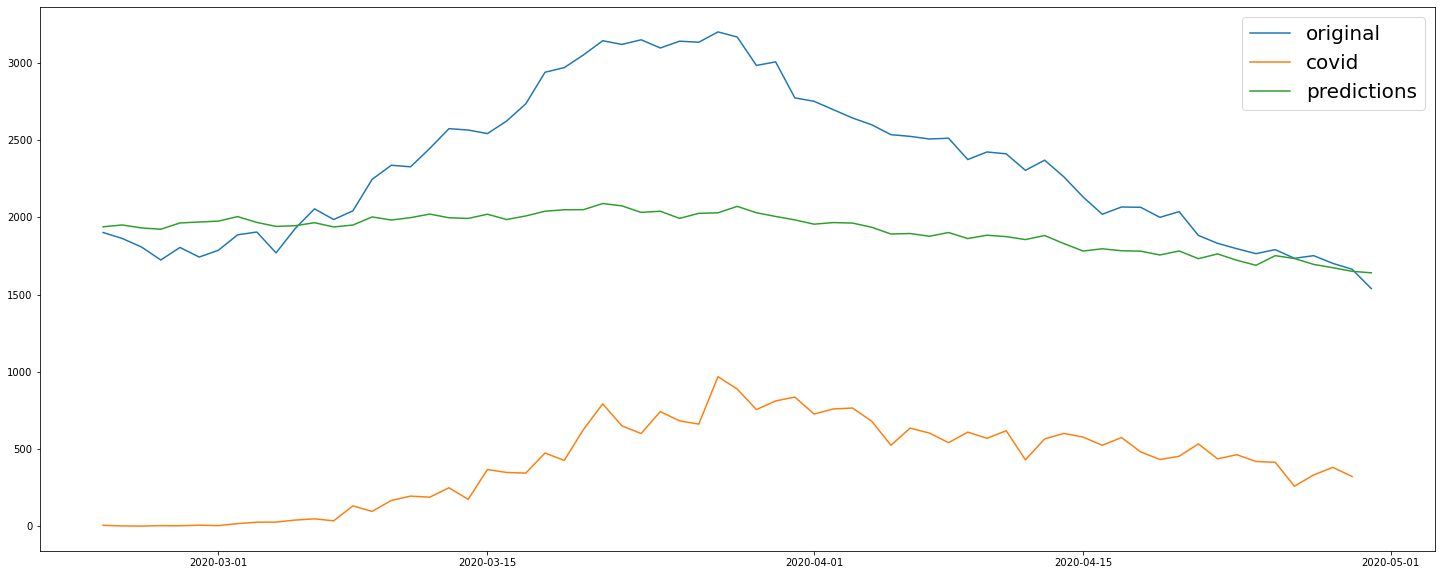

In [134]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25,10))

plt.plot(ts_covid_period, label='original')
plt.plot(ts_decessi_covid, label='covid')
plt.plot(ts_predictions_covid_period, label='predictions')

plt.legend(prop={'size': 20})
plt.show()

In [135]:
print('Decessi totali in data 27/03/2020 =', ts_covid_period['2020-03-27'])

Decessi totali in data 27/03/2020 = 3200


In [136]:
print('Decessi COVID19 in data 27/03/2020 =', ts_decessi_covid['2020-03-27'])

Decessi COVID19 in data 27/03/2020 = 969.0


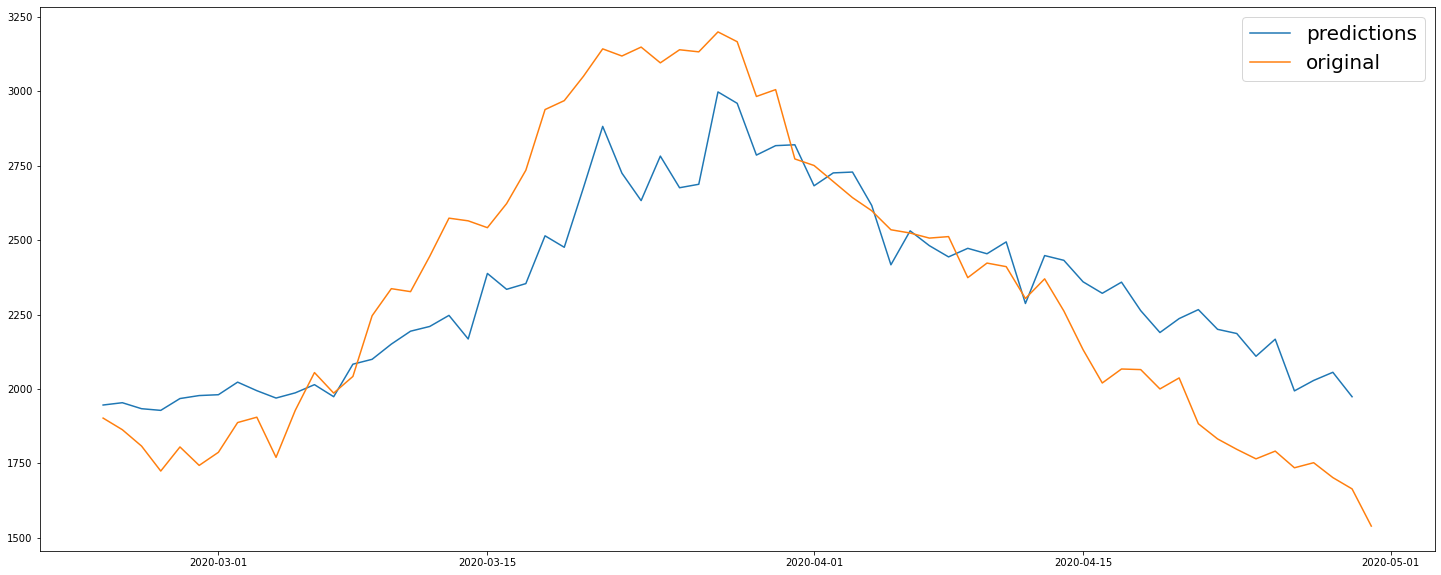

In [137]:
confronto = ts_predictions_covid_period + ts_decessi_covid

plt.figure(figsize=(25,10))

plt.plot(confronto, label='predictions')
plt.plot(ts_covid_period, label='original')
plt.legend(prop={'size': 20})
plt.show()

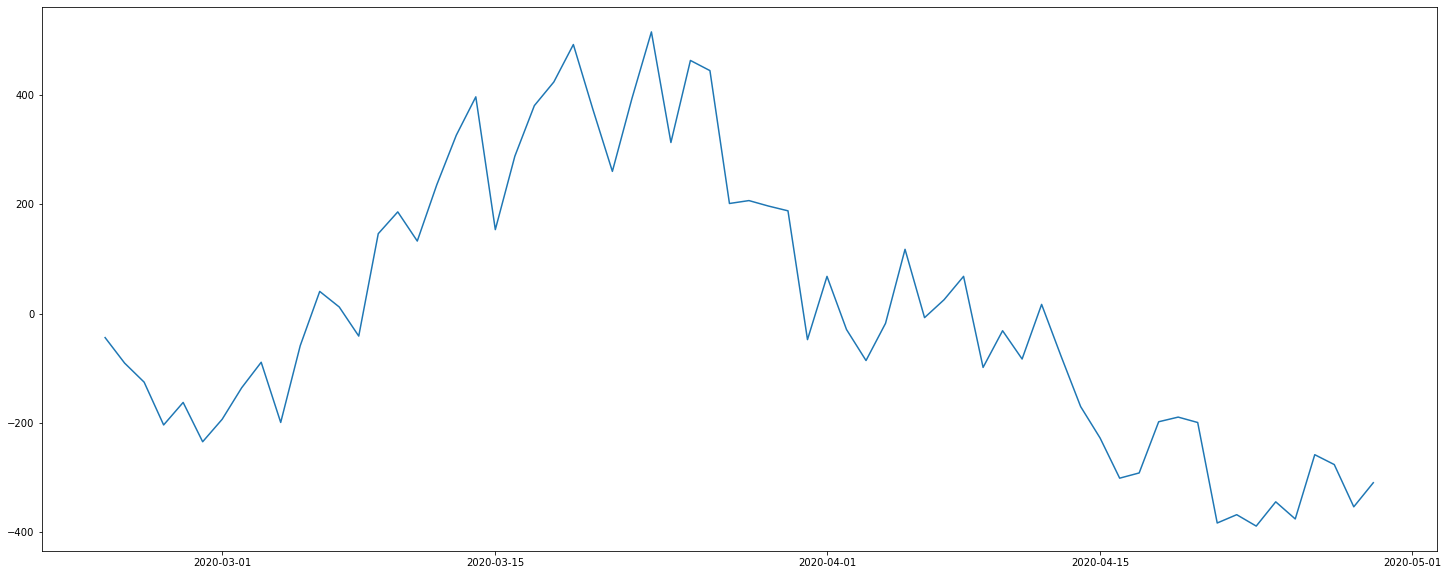

In [149]:
#Trovo la precentuale dei registrati
n = ts_covid_period - ts_predictions_covid_period - ts_decessi_covid

plt.figure(figsize=(25,10))
plt.plot(n)
plt.show()

In [150]:
total = n.sum()
print(int(total))

377


In [143]:
n

2020-02-24    -43.952297
2020-02-25    -90.670448
2020-02-26   -125.551560
2020-02-27   -203.951116
2020-02-28   -162.708977
                 ...    
2020-04-26   -258.453118
2020-04-27   -276.527232
2020-04-28   -353.926539
2020-04-29   -309.799439
2020-04-30           NaN
Length: 67, dtype: float64

In [144]:
ts_covid_period

Data
2020-02-24    1902
2020-02-25    1863
2020-02-26    1808
2020-02-27    1724
2020-02-28    1805
              ... 
2020-04-26    1735
2020-04-27    1752
2020-04-28    1702
2020-04-29    1664
2020-04-30    1539
Name: Totale, Length: 67, dtype: int64

In [145]:
ts_decessi_covid

data
2020-02-24      7.0
2020-02-25      3.0
2020-02-26      2.0
2020-02-27      5.0
2020-02-28      4.0
              ...  
2020-04-25    415.0
2020-04-26    260.0
2020-04-27    333.0
2020-04-28    382.0
2020-04-29    323.0
Name: deceduti, Length: 66, dtype: float64

In [146]:
ts_predictions_covid_period

Data
2020-02-24    1938.952297
2020-02-25    1950.670448
2020-02-26    1931.551560
2020-02-27    1922.951116
2020-02-28    1963.708977
                 ...     
2020-04-26    1733.453118
2020-04-27    1695.527232
2020-04-28    1673.926539
2020-04-29    1650.799439
2020-04-30    1641.028454
Name: Totale, Length: 67, dtype: float64